In [1]:
from IPython.display import Image

# 문제 설명

* 스마트폰 전화 키패드의 각 칸에 다음과 같이 숫자들이 적혀 있습니다.

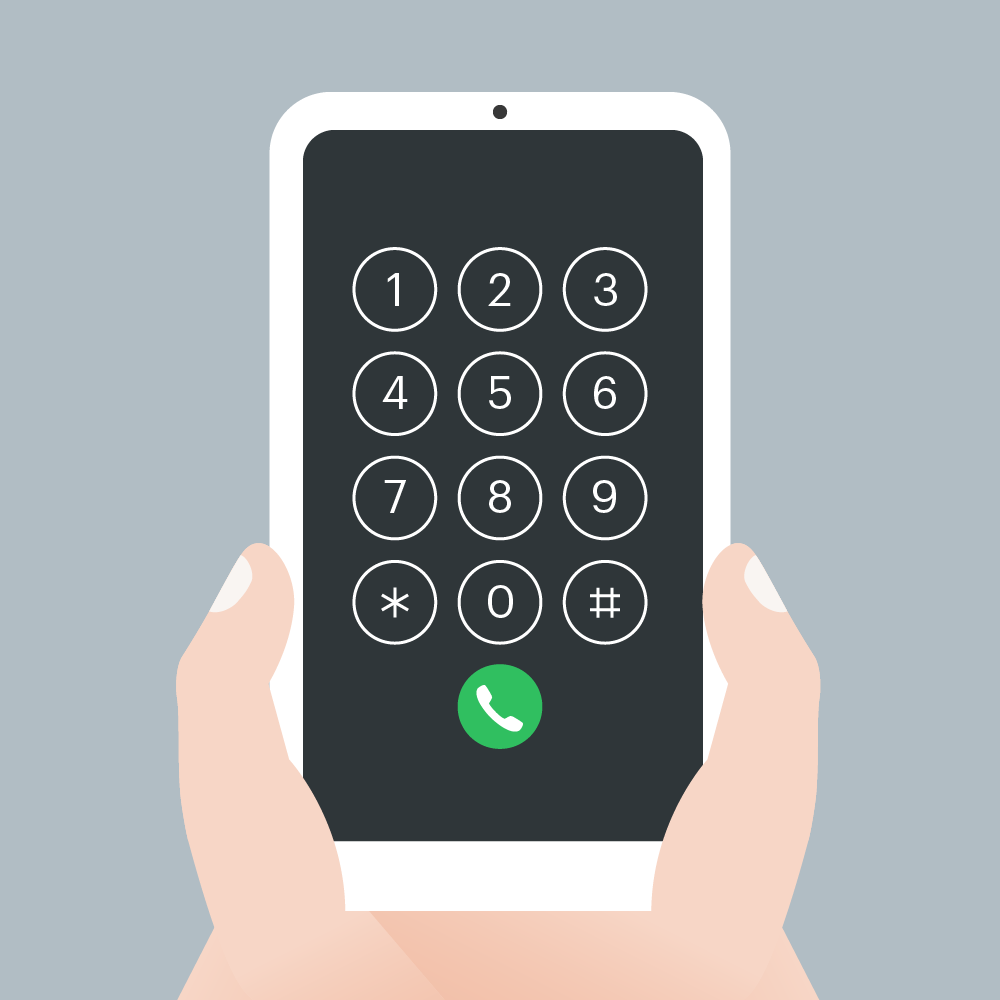

In [2]:
Image('../../../image/kakao_phone1.png', width = 500, height = 400)

* 이 전화 키패드에서 왼손과 오른손의 엄지손가락만을 이용해서 숫자만을 입력하려고 합니다. 맨 처음 왼손 엄지손가락은 * 키패드에 오른손 엄지손가락은 # 키패드 위치에서 시작하며, 엄지손가락을 사용하는 규칙은 다음과 같습니다.
    * 1. 엄지손가락은 상하좌우 4가지 방향으로만 이동할 수 있으며 키패드 이동 한 칸은 거리로 1에 해당합니다.
    * 2.왼쪽 열의 3개의 숫자 1, 4, 7을 입력할 때는 왼손 엄지손가락을 사용합니다.
    * 3.오른쪽 열의 3개의 숫자 3, 6, 9를 입력할 때는 오른손 엄지손가락을 사용합니다.
    * 4.가운데 열의 4개의 숫자 2, 5, 8, 0을 입력할 때는 두 엄지손가락의 현재 키패드의 위치에서 더 가까운 엄지손가락을 사용합니다.
        * 4-1. 만약 두 엄지손가락의 거리가 같다면, 오른손잡이는 오른손 엄지손가락, 왼손잡이는 왼손 엄지손가락을 사용합니다.

* 순서대로 누를 번호가 담긴 배열 numbers, 왼손잡이인지 오른손잡이인 지를 나타내는 문자열 hand가 매개변수로 주어질 때, 각 번호를 누른 엄지손가락이 왼손인 지 오른손인 지를 나타내는 연속된 문자열 형태로 return 하도록 solution 함수를 완성해주세요.

# 제한사항

* numbers 배열의 크기는 1 이상 1,000 이하입니다.
* numbers 배열 원소의 값은 0 이상 9 이하인 정수입니다.
* hand는 "left" 또는 "right" 입니다.
    * "left"는 왼손잡이, "right"는 오른손잡이를 의미합니다.
* 왼손 엄지손가락을 사용한 경우는 L, 오른손 엄지손가락을 사용한 경우는 R을 순서대로 이어붙여 문자열 형태로 return 해주세요.

# 입출력 예시

|numbers|hand|result|
|---|---|---|
|[1, 3, 4, 5, 8, 2, 1, 4, 5, 9, 5]|"right"|"LRLLLRLLRRL"|
|[7, 0, 8, 2, 8, 3, 1, 5, 7, 6, 2]|"left"|"LRLLRRLLLRR"|
|[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]|"right"|"LLRLLRLLRL"|

In [3]:
def solution(numbers, hand):
    answer = ''
    num_position = {'1' : (0, 0), '2' : (1, 0), '3' : (2, 0),
               '4' : (0, 1), '5' : (1, 1), '6' : (2, 1),
               '7' : (0, 2), '8' : (1, 2), '9' : (2, 2),
                '*' : (0, 3), '0' : (1, 3), '#' : (2, 3)
               }
    
    left_f = '*'
    right_f = '#'
    
    for n in numbers:
        now_x, now_y = num_position[str(n)][0], num_position[str(n)][1]
        if n in [1,4,7]:
            answer += 'L'
            left_f = str(n)
        elif n in [3,6,9]:
            answer += 'R'
            right_f = str(n)
        else:
            x_l, y_l =  num_position[left_f][0], num_position[left_f][1]
            x_r, y_r =  num_position[right_f][0], num_position[right_f][1]
            l_distance = abs(x_l - now_x) + abs(y_l - now_y)
            r_distance = abs(x_r - now_x) + abs(y_r - now_y)

            if l_distance < r_distance:
                answer += 'L'
                left_f = str(n)
            elif l_distance > r_distance:
                answer += 'R'
                right_f = str(n)
            else:
                if hand == 'left':
                    answer += 'L'
                    left_f = str(n)
                else:
                    answer += 'R'
                    right_f = str(n)
    return answer

In [4]:
for numbers, hand in [[[1, 3, 4, 5, 8, 2, 1, 4, 5, 9, 5], "right"], [[7, 0, 8, 2, 8, 3, 1, 5, 7, 6, 2], "left"], [[1, 2, 3, 4, 5, 6, 7, 8, 9, 0], "right"]]:
    print(solution(numbers, hand))

LRLLLRLLRRL
LRLLRRLLLRR
LLRLLRLLRL


# 풀이 과정 및 주의사항

* 거리를 계산하기 위해 키패드 안의 숫자를 좌표평면에 위치하게 만들어서 x, y값을 부여한다.(num_position)
* 맨 처음에는 손가락이 각각 *, #에 위치하나, 각 손가락으로 숫자를 누르면 손가락은 해당 숫자에 위차하도록 갱신한다.
* 현재 눌러야 하는 숫자와 이전에 왼쪽, 오른쪽으로 누른 숫자의 거리를 절대값을 사용하여 계산한다(x값의 차이 + y 값의 차이)
* 거리가 더 짧은 손가락으로 해당 숫자를 누르고, 만약 거리가 같으면 hand를 이용해 오른손잡이면 오른손, 왼손잡이인 경우 왼손으로 누르도록 한다.
* 사용했던 손가락들을 answer에 순차적으로 더해준다.

https://school.programmers.co.kr/learn/courses/30/lessons/67256